# 第7章: 機械学習

## 60. データの入手・整形

In [1]:
!wget https://dl.fbaipublicfiles.com/glue/data/SST-2.zip -P data/
!unzip -o data/SST-2.zip -d data/
!rm data/SST-2.zip

--2025-04-22 01:23:38--  https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.68, 3.171.22.13, 3.171.22.118, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7439277 (7.1M) [application/zip]
Saving to: ‘data/SST-2.zip’

SST-2.zip           100%[===================>]   7.09M  --.-KB/s    in 0.1s    

2025-04-22 01:23:39 (57.6 MB/s) - ‘data/SST-2.zip’ saved [7439277/7439277]

Archive:  data/SST-2.zip
  inflating: data/SST-2/dev.tsv      
  inflating: data/SST-2/original/README.txt  
  inflating: data/SST-2/original/SOStr.txt  
  inflating: data/SST-2/original/STree.txt  
  inflating: data/SST-2/original/datasetSentences.txt  
  inflating: data/SST-2/original/datasetSplit.txt  
  inflating: data/SST-2/original/dictionary.txt  
  inflating: data/SST-2/original/original_rt_snippets.txt  
  inflating: data/SST-2/original/se

In [2]:
import csv

def pos_or_neg(file_name):
  positive = 0
  negative = 0
  with open(file_name, 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    for row in reader:
      if (row[1] == '1'):
        positive += 1
      else:
        negative += 1
  return positive, negative

train_positive, train_negative = pos_or_neg('./data/SST-2/train.tsv')
dev_positive, dev_negative = pos_or_neg('./data/SST-2/dev.tsv')

print('学習データのポジティブの事例数：', train_positive, ', ネガティブの事例数：', train_negative)
print('検証データのポジティブの事例数：', dev_positive, ', ネガティブの事例数：', dev_negative)

# TSVファイルの処理     https://words.af-e.net/extension-tsv/#google_vignette
# 最初の行を読み捨てる  https://ensta-blog.com/python/next/

学習データのポジティブの事例数： 37569 , ネガティブの事例数： 29780
検証データのポジティブの事例数： 444 , ネガティブの事例数： 428


## 61. 特徴ベクトル

In [3]:
import collections

def make_dict(file_name):
  dictionary = []
  with open(file_name, 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    for row in reader:
      feature = dict(collections.Counter(row[0].split()))
      dictionary.append({'text': row[0], 'label': row[1], 'feature': feature})
  return dictionary

train_dict =  make_dict('./data/SST-2/train.tsv')
dev_dict = make_dict('./data/SST-2/dev.tsv')

print('学習データのリスト：')
for i in range(5):
  print(train_dict[i])
print('')

print('検証データのリスト：')
for i in range(5):
  print(dev_dict[i])

学習データのリスト：
{'text': 'hide new secretions from the parental units ', 'label': '0', 'feature': {'hide': 1, 'new': 1, 'secretions': 1, 'from': 1, 'the': 1, 'parental': 1, 'units': 1}}
{'text': 'contains no wit , only labored gags ', 'label': '0', 'feature': {'contains': 1, 'no': 1, 'wit': 1, ',': 1, 'only': 1, 'labored': 1, 'gags': 1}}
{'text': 'that loves its characters and communicates something rather beautiful about human nature ', 'label': '1', 'feature': {'that': 1, 'loves': 1, 'its': 1, 'characters': 1, 'and': 1, 'communicates': 1, 'something': 1, 'rather': 1, 'beautiful': 1, 'about': 1, 'human': 1, 'nature': 1}}
{'text': 'remains utterly satisfied to remain the same throughout ', 'label': '0', 'feature': {'remains': 1, 'utterly': 1, 'satisfied': 1, 'to': 1, 'remain': 1, 'the': 1, 'same': 1, 'throughout': 1}}
{'text': 'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ', 'label': '0', 'feature': {'on': 1, 'the': 2, 'worst': 1, 'revenge-of-the-nerds': 1, 'clic

## 62. 学習

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# 学習データのベクトル化
vec = DictVectorizer()
X_train_feature = [data['feature'] for data in train_dict]
X_train = vec.fit_transform(X_train_feature)
Y_train = [data['label'] for data in train_dict]

# 学習
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train, Y_train)

# ベクトル化          https://nakano-tomofumi.hatenablog.com/entry/2017/11/06/121729
# ロジスティック回帰  https://qiita.com/renesisu727/items/6df782aaf8b53062cdb6

LogisticRegression(solver='liblinear')

## 63. 予測

In [5]:
first_X_dev = vec.transform(dev_dict[0]['feature'])
predict = logistic.predict(first_X_dev)[0]
print('予測結果 =', predict, ', 正解 =', dev_dict[0]['label'])

# fit, transform, fit_transformの違い https://mathwords.net/fittransform#google_vignette

予測結果 = 1 , 正解 = 1


## 64. 条件付き確率

In [6]:
probs = logistic.predict_proba(first_X_dev)[0]
print(probs)

# 条件付確率の出力  https://qiita.com/0NE_shoT_/items/c42d8093e2fed9bf1b7a

[0.00419195 0.99580805]


## 65. テキストのポジネガの予測

In [7]:
text = "the worst movie I 've ever seen"
text_dict = dict(collections.Counter(text.split()))
text_vec = vec.transform(text_dict)

predict = logistic.predict(text_vec)[0]
print('予測結果 =', predict)

予測結果 = 0


## 66. 混同行列の作成

In [8]:
from sklearn import metrics

X_dev_feature = [data['feature'] for data in dev_dict]
X_dev = vec.transform(X_dev_feature)
Y_dev = [data['label'] for data in dev_dict]

dev_predict = logistic.predict(X_dev)
print(metrics.confusion_matrix(Y_dev, dev_predict))

# 混同行列  https://qiita.com/monda00/items/a2ee8e0da51953c24da8

[[334  94]
 [ 71 373]]


## 67. 精度の計測

In [9]:
def measure(true, pred):
  accuracy = metrics.accuracy_score(true, pred)
  precision = metrics.precision_score(true, pred)
  recall = metrics.recall_score(true, pred)
  f1 = metrics.f1_score(true, pred)
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")

Y_train = [int(y) for y in Y_train]
Y_dev = [int(y) for y in Y_dev]
train_predict = [int(p) for p in logistic.predict(X_train)]
dev_predict = [int(p) for p in logistic.predict(X_dev)]

print('学習データ：')
measure(Y_train, train_predict)
print('')

print('検証データ：')
measure(Y_dev, dev_predict)

学習データ：
Accuracy: 0.9428
Precision: 0.9435
Recall: 0.9547
F1-score: 0.9491

検証データ：
Accuracy: 0.8108
Precision: 0.7987
Recall: 0.8401
F1-score: 0.8189


## 68. 特徴量の重みの確認

In [10]:
import pandas as pd

df = pd.DataFrame({'feature': vec.get_feature_names_out(), 'weight': logistic.coef_[0]})
print('降順：\n', df.sort_values('weight')[-20:])
print('')
print('昇順：\n', df.sort_values('weight')[:20])

# dfをソート      https://note.nkmk.me/python-pandas-sort-values-sort-index/#sort_values
# dfの先頭を返す  https://note.nkmk.me/python-pandas-head-tail/

降順：
            feature    weight
6901    intriguing  2.557987
4802   fascinating  2.587183
5877      half-bad  2.587456
6574    impressive  2.615727
2181      charming  2.636098
12089        solid  2.637734
7627       likable  2.705685
14212      vividly  2.723359
2180       charmer  2.781315
4321     enjoyable  2.829664
788      appealing  2.863963
13492        treat  2.879891
13103     terrific  2.923951
10145        prose  2.932516
14622    wonderful  2.995053
1263     beautiful  3.008291
6169     hilarious  3.191606
9915      powerful  3.254749
10675   remarkable  3.473988
10593   refreshing  3.479837

昇順：
              feature    weight
7365         lacking -4.357444
7367           lacks -4.088263
14674          worst -4.019129
3543          devoid -3.706376
8216            mess -3.698030
4729         failure -3.643959
12618         stupid -3.373302
1615            bore -3.302295
5021            flat -3.229071
3456      depressing -3.217432
7780           loses -3.216710
14322   

## 69. 正則化パラメータの変更

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


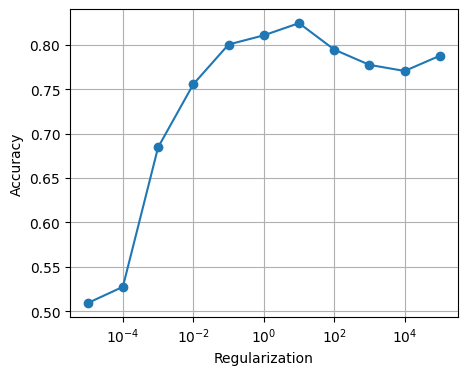

In [11]:
import matplotlib.pyplot as plt

C_list = [10 ** i for i in range(-5, 6)]
accuracy_list = []

# 正則化パラメータの変更
for C in C_list:
  model = LogisticRegression(C=C, solver='liblinear')
  model.fit(X_train, Y_train)
  predict = model.predict(X_dev)
  accuracy = metrics.accuracy_score(Y_dev, predict)
  accuracy_list.append(accuracy)

# 描画
plt.figure(figsize=(5, 4))
plt.plot(C_list, accuracy_list, marker='o')
plt.xscale('log')
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()